In [2]:
import numpy as np

import matplotlib.pyplot as plt

import bilYonMod as bil

plt.style.use('dark_background')

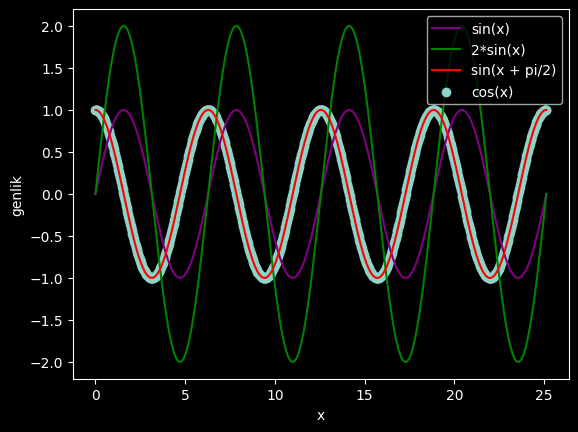

In [2]:
x = np.linspace(0, 8*np.pi, 1000)
y = np.sin(x)
y2 = 2*np.sin(x)
y3 = np.sin(x + np.pi/2)
y4 = np.cos(x)

plt.plot(x,y, color = 'purple', label = 'sin(x)')
plt.plot(x,y2, color = 'green', label = '2*sin(x)')
plt.plot(x,y3, color = 'red', label = 'sin(x + pi/2)')
plt.scatter(x,y4, label = 'cos(x)')
plt.ylabel('genlik')
plt.xlabel('x')
plt.legend()
# plt.grid(color = 'green')
plt.show()

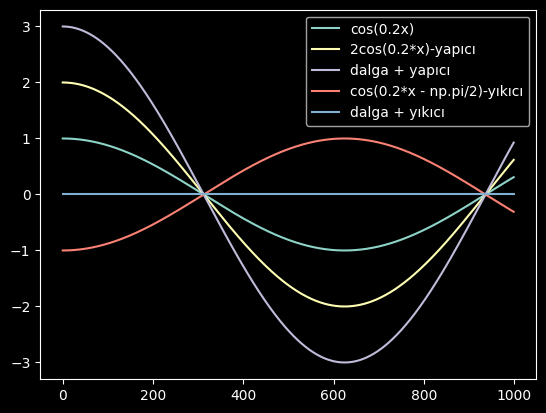

In [3]:
sa = np.cos(0.2*x + 0)

plt.plot(sa, label = 'cos(0.2x)')

sa_yapıcı = 2*np.cos(0.2*x + 0)

plt.plot(sa_yapıcı, label = '2cos(0.2*x)-yapıcı')

plt.plot(sa + sa_yapıcı, label = 'dalga + yapıcı')

sa_yıkıcı = np.cos(0.2*x + np.pi)

plt.plot(sa_yıkıcı ,label = 'cos(0.2*x - np.pi/2)-yıkıcı')

plt.plot(sa + sa_yıkıcı, label = 'dalga + yıkıcı')

plt.legend()

# Ödev 1

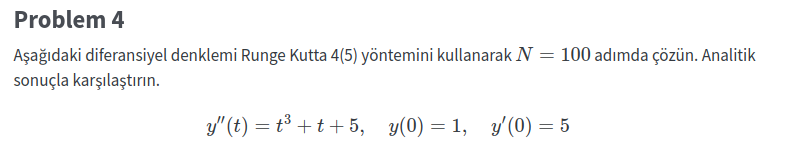

In [2]:
import scipy.integrate as spint

import numpy as np

import scipy as sp

import matplotlib.pyplot as plt

plt.style.use('dark_background')

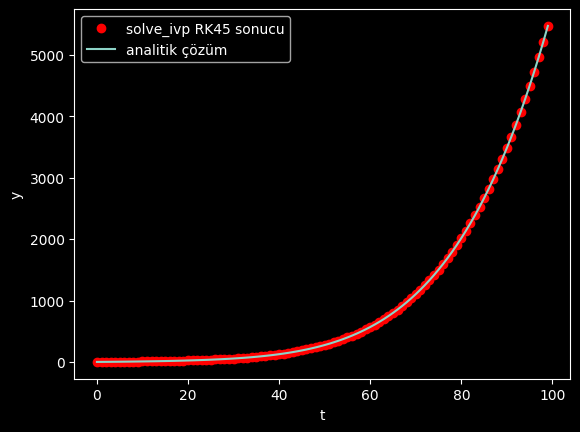

In [15]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt

def fonk_yVek_x(t, yVek):
    "y''(t) = t**3 + t + 5"
    "y'(t) = g(t)"
    "g'(t) = t**3 + t + 5"
    "bu işlemler yapılırsa 2.derece ode 2 tane 1. derece ode ye dönüşür"
    dydt = yVek[1]
    return np.array([dydt , t**3 + t + 5])

y0 = np.array([1, 5])  

t_tum = np.linspace(0, 10, 100)

t0 = 0

tson = 10

y_tum_scipy = spint.solve_ivp(fonk_yVek_x, (t0,tson), y0, t_eval=t_tum, method='RK45')

def analitik(t):
    return ((t**5)/20 + (t**3)/6 + (5*t**2)/2 + 5*t + 1)

plt.plot(y_tum_scipy.y[0], "ro", label='solve_ivp RK45 sonucu')
plt.plot(analitik(t_tum), label = 'analitik çözüm')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


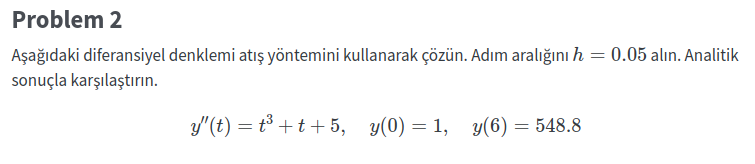

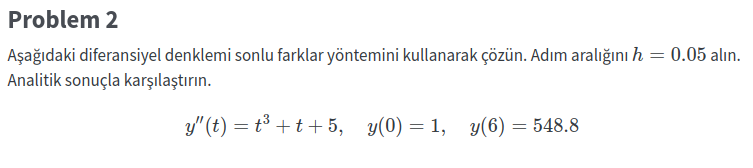

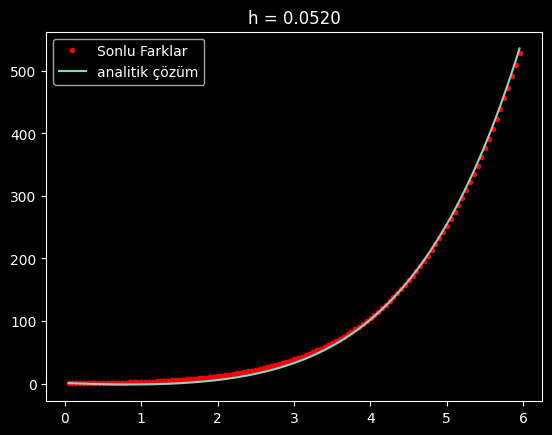

In [21]:
def second_dev(x):
    return x**3 + x + 5

h = 0.052 # bu değer daha da iyi sonuç veriyor ama nedenini bilmiyorum

t = np.arange(h,6.0, 0.05)

m= len(t) 
L = 1
katsayi_mat = np.eye(m, m, k=-1) + -2.0*np.eye(m, m) + np.eye(m, m, k=1) #Finite diferences tridiagonalini böyle hızlıca üretiyorum
# k=1 veya -1 ile diagonal olması gereken den daha ileri veya geri kaydırabiliyorum 
# https://stackoverflow.com/questions/47761102/block-tridiagonal-matrices-how-to-program-this-kind-of-matrix

sonuc_vec = np.zeros([len(t)])

sonuc_vec[0] = (h**2 )* second_dev(t[0]) -1

sonuc_vec[-1] = (h**2 )* second_dev(t[-1]) -548.8



for i in range(1,len(t)-1):
    sonuc_vec[i] = (h**2)* second_dev(t[i])


solution_hopefully = np.linalg.solve(katsayi_mat, sonuc_vec)

def analitik(t):
    return (1/20) * t**5 + (1/2) * t**3 + (5/2) * t**2 - 5.499 * t + 1

plt.plot(t, solution_hopefully, '.', label='Sonlu Farklar', color = "red")
plt.plot(t, analitik(t), label = 'analitik çözüm')
plt.title("h = %1.4f" %h)
plt.legend()